### **SHAPEAI - DATA SCIENTIST TRAINING & INTERNSHIP**

### **Author : Midhir Nambiar**

### **Task : Salary Prediction using Linear Regression**

Problem Statement - Given a dataset which captures gross salary from July 2013 to June 2014 and includes only those employees who were employed on June 2014. Predict the Salary of the employees in Blatimore

Outline:
1. Importing Dataset
2. Data Cleaning & Data Preparation
3. Exploratory Data Analysis
4. Feature Engineering
5. Train-Test Split
6. Model Building
7. Model Evaluation

In [ ]:
# Importing Libraries for Analysis
import numpy as np
import pandas as pd

# Importing Libraries for Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for Train-Test Split
from sklearn.model_selection import train_test_split

# Import Libraries for Scaling
from sklearn.preprocessing import StandardScaler

# Import Libraries for Model Building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### **Importing Dataset**

In [ ]:
salary = pd.read_csv('/content/trainfile.csv')
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [ ]:
salary.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


### **Data Cleaning & Preparation**

In [ ]:
print(salary.shape)

(18981, 7)


In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


There are 18981 rows & 7 columns where all columns are of type 'object' in the Dataset.

In [ ]:
salary.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Dix,Kenneth D",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [ ]:
# It is always a good practice to work on copy of the dataset instead of the orginal one
salary_cpy = salary.copy()
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
# Since the 'Name' column has leading space , we need to remove it
salary_cpy.columns = salary_cpy.columns.str.strip()
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
# Dropping the null values of 'HireDate' as it is feasible
salary_cpy = salary_cpy.dropna(subset = ['HireDate'])
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
# Dropping 'GrossPay'
salary_cpy = salary_cpy.drop('GrossPay' , axis = 1)
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00


In [ ]:
# Value counts on AgencyID
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
A99200      1
W02688      1
W02698      1
W02509      1
W02524      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1177 agencies in blatimore , as per a general understanding AgencyID represents the Agency , so we should have the same number of agencies as well. But after validating it seems one agency is having multiple agency ID's .

In [ ]:
# Value counts on Agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
M-R Labor Commissioner         6
Council Services               6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Name: Agency, Length: 65, dtype: int64

In [ ]:
# Value counts on JobTitle
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
EDUCATIONAL COORDINATOR              1
STAFF DEVELOPMENT/TRAINING COO       1
RECYCLING COORDINATOR                1
Database Specialist Senior           1
FIRE PREVENTION INSPECTOR II         1
Name: JobTitle, Length: 1073, dtype: int64

In [ ]:
# Value counts on HireDate
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/27/1997       1
08/18/1981       1
03/29/2000       1
12/23/2004       1
04/06/1984       1
Name: HireDate, Length: 4737, dtype: int64

In [ ]:
# Removing $ from Annual Salary and converting it into float
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [ ]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [ ]:
# Breaking the HireDate column into three new columns - Day , Month , Year
salary_cpy['HireDay'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_cpy['HireMonth'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[0:2])))
salary_cpy['HireYear'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[6:])))

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [ ]:
# Trimming all the categorical columns to make sure there are no leading & trailing spaces and no double spaces between the words
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  " , " "))
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  " , " "))
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  " , " "))

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [ ]:
# It can be seen some of the job titles are in upper case , some with lower and a mix of both which may affect our analysis ,so we will
# convert all of them to uppercase
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : (str(x).upper()))
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : (str(x).upper()))
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : (str(x).upper()))

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013


This is a Regression problem , not a classification problem so there is nothing for an Imbalanced Data

The last thing left in Data Preparation is Outlier Treatment , so lets create a box plot for the AnnualSalary and check for outliers if any.

In [ ]:
salary_cpy.shape

(18911, 9)

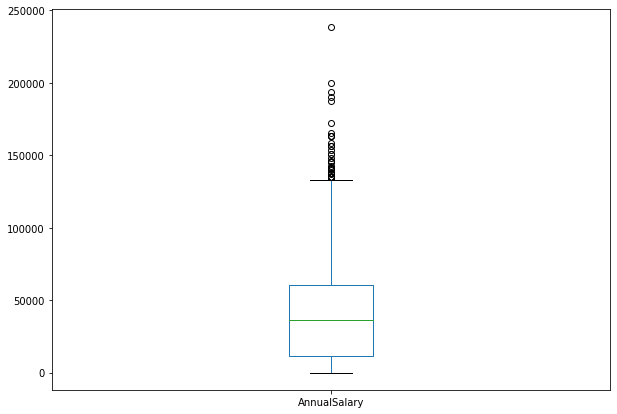

In [ ]:
plt.figure(figsize =(10,7))
salary_cpy.AnnualSalary.plot.box()
plt.show()

Conclusion : 
1. We can say there are few salaries which are way far from other salaries.
2. They might affect our prediction , so we must eliminate them.

In [ ]:
# Summary stats of AnnualSalary
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [ ]:
# Deleting rows whose salary are > 1,50,000
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<140000]

In [ ]:
salary_cpy.shape

(18885, 9)

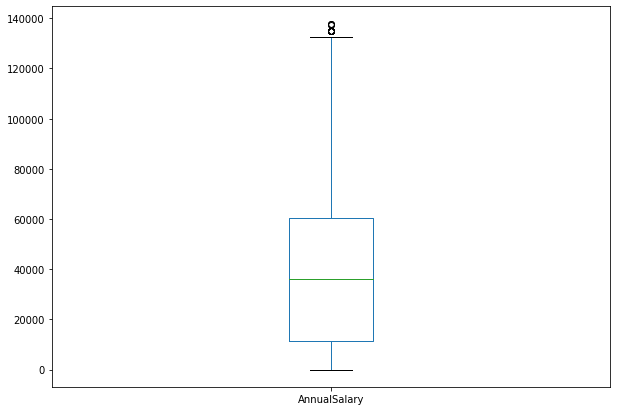

In [ ]:
plt.figure(figsize =(10,7))
salary_cpy.AnnualSalary.plot.box()
plt.show()

### **Exploratory Data Analysis**

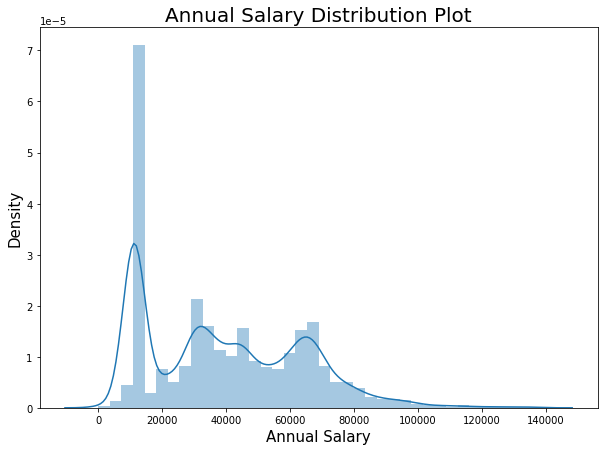

In [ ]:
# Distribution of AnnualSalary using distplot

plt.figure(figsize = (10,7))
sns.distplot(salary_cpy.AnnualSalary)
plt.title('Annual Salary Distribution Plot',fontsize = 20)
plt.xlabel('Annual Salary',fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.show()

Conclusion : The data is distributed very randomly and there seems to be not many people with salary more than 1,00,000

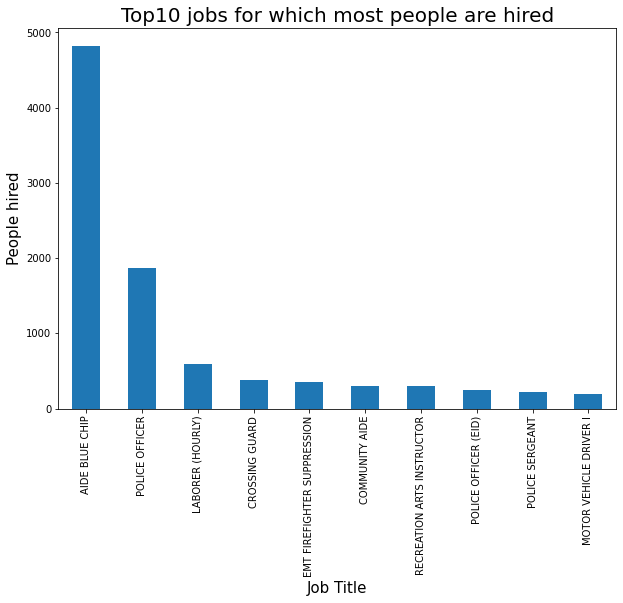

In [ ]:
# Top 10 Jobs for which people are hired the most using barplot

plt.figure(figsize =(10,7))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.title('Top10 jobs for which most people are hired',fontsize = 20)
plt.xlabel('Job Title',fontsize = 15)
plt.ylabel('People hired',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

Conclusion : Maximum number of people were hired for **Aide Blue Chip**

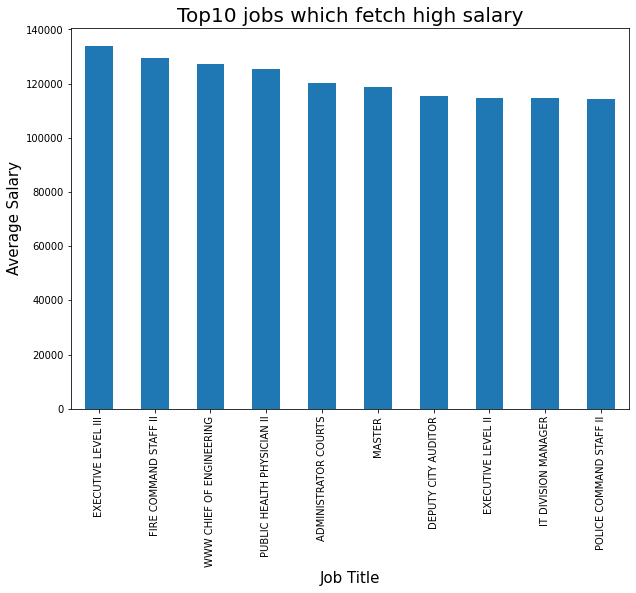

In [ ]:
# Top 10 Jobs which fetch highest salary using bar plot

plt.figure(figsize =(10,7))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending = False).head(10).plot.bar()
plt.title('Top10 jobs which fetch high salary',fontsize = 20)
plt.xlabel('Job Title',fontsize = 15)
plt.ylabel('Average Salary',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

Conclusion : Job of **Executive Level III** fetches the maximum salary

In [ ]:
# Jobs whose average pay is greater than the total average salary

# Finding the mean salary
mean_sal = salary_cpy.AnnualSalary.mean()

# Number of jobs paying more than the mean salary
good_paying_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary > mean_sal]['JobTitle'].count()

797

Conclusion : These are good paying jobs.

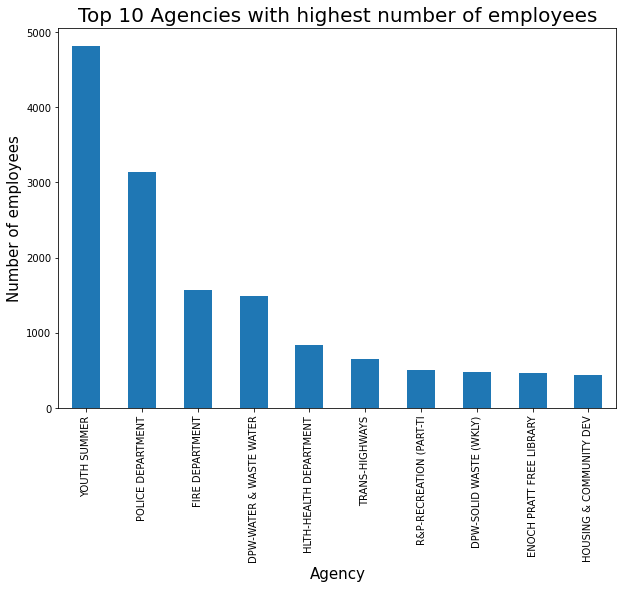

In [ ]:
# Top 10 Agency with highest number of employees using barplot

plt.figure(figsize = (10,7))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.title('Top 10 Agencies with highest number of employees',fontsize = 20)
plt.xlabel('Agency',fontsize = 15)
plt.ylabel('Number of employees',fontsize = 15)
plt.show()

Conclusion : **Youth Summer** is the **Agency** which has the highest number of employees

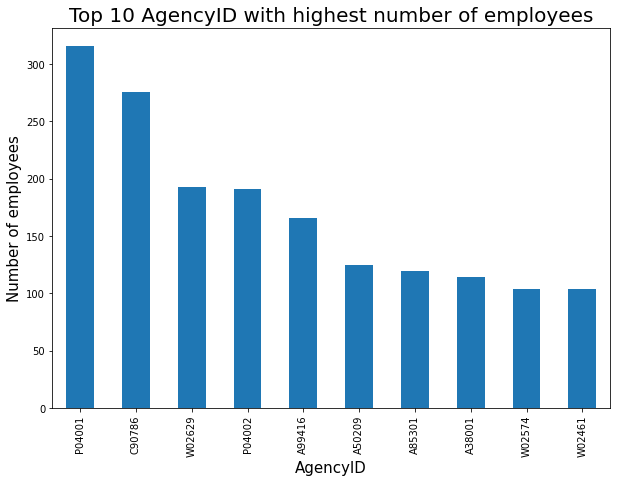

In [ ]:
# Top 10 AgencyID with highest number of employees using barplot

plt.figure(figsize = (10,7))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.title('Top 10 AgencyID with highest number of employees',fontsize = 20)
plt.xlabel('AgencyID',fontsize = 15)
plt.ylabel('Number of employees',fontsize = 15)
plt.show()

Conclusion : **P04001** is the **AgencyID** with highest number of employees

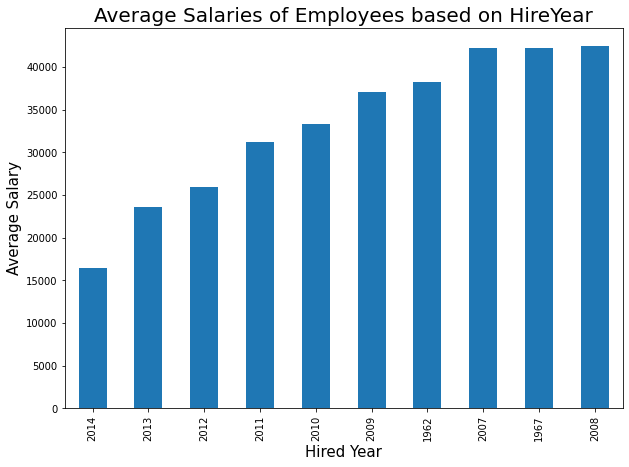

In [ ]:
# People hired in which year have lowest salaries

plt.figure(figsize = (10,7))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.title('Average Salaries of Employees based on HireYear',fontsize = 20)
plt.xlabel('Hired Year',fontsize = 15)
plt.ylabel('Average Salary',fontsize = 15)
plt.show()

Conclusion : As the hired date increases , the salary tends to decrease. The employees who have been hired recently tend to have lower salary as compared to those who were hired years ago.

Also the trend above suggests that the salary of the employee increases with experience in the company , So now lets calculate the experience in days with the Agency

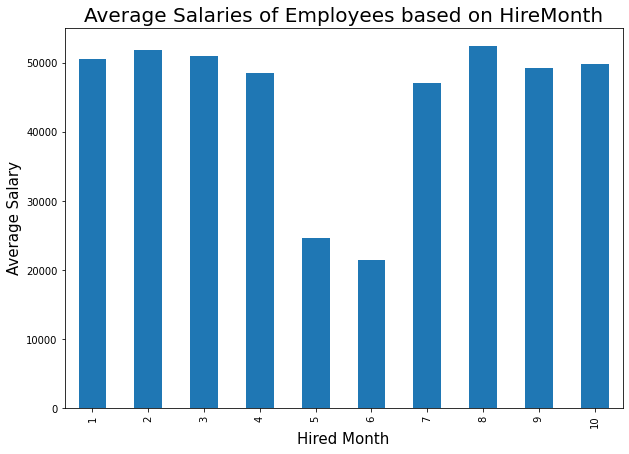

In [ ]:
# Salary of the employees monthwise

plt.figure(figsize = (10,7))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().head(10).plot.bar()
plt.title('Average Salaries of Employees based on HireMonth',fontsize = 20)
plt.xlabel('Hired Month',fontsize = 15)
plt.ylabel('Average Salary',fontsize = 15)
plt.show()

Conclusion : The above graph suggests that the employees hired in the 6th month may be given low salaries/much employees were not hired during this month.

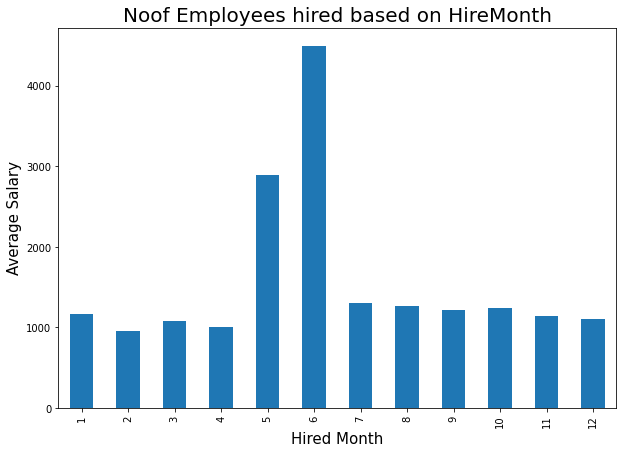

In [ ]:
# Salary of the employees monthwise

plt.figure(figsize = (10,7))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.title('Noof Employees hired based on HireMonth',fontsize = 20)
plt.xlabel('Hired Month',fontsize = 15)
plt.ylabel('Average Salary',fontsize = 15)
plt.show()

Conclusion : More employees have been hired in the month of May and June but they have relatively lower salaries.

<Figure size 720x504 with 0 Axes>

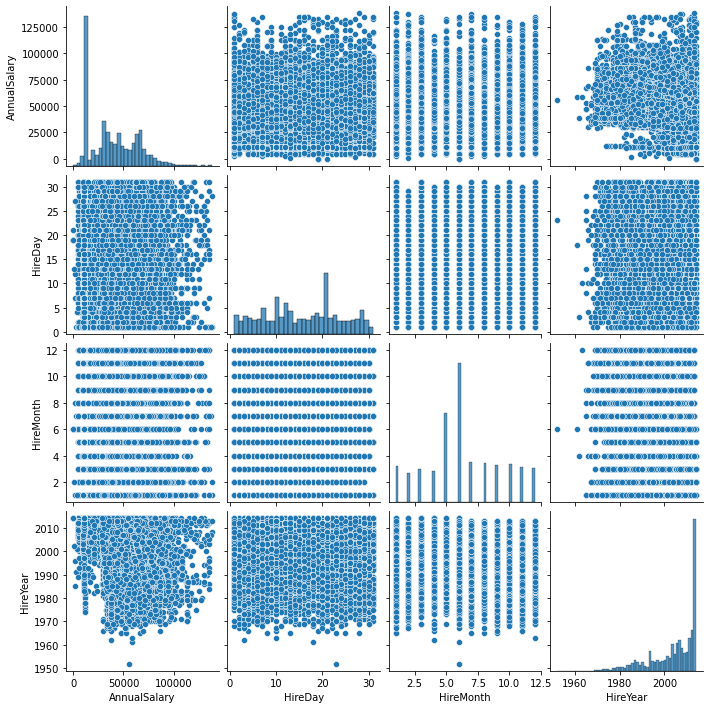

In [ ]:
# Checking if there is any relation between any of the numerical variables using pairplot

plt.figure(figsize = (10,7))
sns.pairplot(salary_cpy)
plt.show()

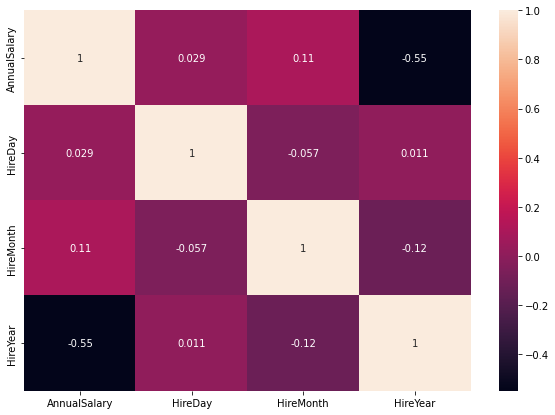

In [ ]:
# Plotting a heatmap

plt.figure(figsize = (10,7))
sns.heatmap(salary_cpy.corr(),annot = True)
plt.show()

### **Feauture Engineering**

In [ ]:
# Creating a copy of the Dataframe

salary_master = salary_cpy.copy()

We are using Mean Encoding here as the number of labels of  categorical variables are very high and if we use any other method that would create unecessary variables or the labelling might not be appropriate

In [ ]:
# Apply Mean Encoding for JobTitle

mean_job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle']

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18885, dtype: float64

In [ ]:
# Apply Mean Encoding for Agency

mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(mean_agency)
salary_master['Agency']

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61481.005417
             ...     
18976    11313.967200
18977    11313.967200
18978    61481.005417
18979    61481.005417
18980    42565.513078
Name: Agency, Length: 18885, dtype: float64

In [ ]:
# Apply Mean Encoding for AgencyID

mean_agencyid = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyid)
salary_master['AgencyID']

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18885, dtype: float64

Hence we have converted all the categorical variables to numerical variables.

In [ ]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18885 non-null  object 
 1   JobTitle      18885 non-null  float64
 2   AgencyID      18885 non-null  float64
 3   Agency        18885 non-null  float64
 4   HireDate      18885 non-null  object 
 5   AnnualSalary  18885 non-null  float64
 6   HireDay       18885 non-null  int64  
 7   HireMonth     18885 non-null  int64  
 8   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
# Dropping Name and HireDate Column

salary_master = salary_master.drop(['HireDate','Name'] , axis = 1)
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18885 non-null  float64
 1   AgencyID      18885 non-null  float64
 2   Agency        18885 non-null  float64
 3   AnnualSalary  18885 non-null  float64
 4   HireDay       18885 non-null  int64  
 5   HireMonth     18885 non-null  int64  
 6   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


### **Train Test Split**

In [ ]:
# Split the data into train & test data using train-test split

salary_train , salary_test = train_test_split(salary_master , train_size = 0.7 , random_state = 10)

Checking whether the data has been split or not

In [ ]:
print(salary_train.shape)
print(salary_test.shape)

(13219, 7)
(5666, 7)


In [ ]:
# Dividing train data into dependent & independent variables
y_train = salary_train.pop('AnnualSalary')
x_train = salary_train

# Dividing test data into dependent & independent variables
y_test = salary_test.pop('AnnualSalary')
x_test = salary_test

In [ ]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,21570.423841,21474.446429,31494.602740,26,3,2007
7529,11313.967200,11310.000000,11313.967200,16,6,2014
15366,11313.967200,11310.000000,11313.967200,10,6,2013
3237,11313.967200,11310.000000,11313.967200,11,6,2009
16659,11313.967200,11310.000000,11313.967200,19,6,2014
...,...,...,...,...,...,...
9453,11313.967200,11310.000000,11313.967200,21,5,2014
7371,29925.666667,33754.400000,31594.490526,4,3,2002
17822,34098.128205,38263.434783,31494.602740,27,5,1999
7373,42275.081081,62661.900000,62661.900000,6,10,1969


### **Feature Scaling**

In [ ]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,-0.739384,-0.813601,-0.382481,1.220063,-1.143251,0.282241
7529,-1.162446,-1.272054,-1.345816,0.026686,-0.124696,0.955021
15366,-1.162446,-1.272054,-1.345816,-0.689340,-0.124696,0.858910
3237,-1.162446,-1.272054,-1.345816,-0.570003,-0.124696,0.474464
16659,-1.162446,-1.272054,-1.345816,0.384699,-0.124696,0.955021
...,...,...,...,...,...,...
9453,-1.162446,-1.272054,-1.345816,0.623375,-0.464215,0.955021
7371,-0.394744,-0.259730,-0.377713,-1.405367,-1.143251,-0.198316
17822,-0.222637,-0.056356,-0.382481,1.339401,-0.464215,-0.486650
7373,0.114649,1.044104,1.105307,-1.166691,1.233377,-3.369991


In [ ]:
scaler = StandardScaler()
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])
x_test

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
9797,0.871212,0.960094,1.051861,1.340110,0.549432,0.374341
4541,-1.163184,-1.267142,-1.344440,0.625637,-0.465372,0.953483
2860,-1.163184,-1.267142,-1.344440,1.459188,-0.127104,0.856960
8139,1.335218,1.374789,1.500812,0.268400,0.549432,0.374341
2876,0.033694,0.192605,0.024878,0.387479,0.211164,0.760436
...,...,...,...,...,...,...
11213,0.335475,0.495910,0.403834,0.506558,-0.127104,0.856960
3366,1.288703,1.583918,1.172630,1.697346,0.887700,0.856960
11606,0.485825,1.057566,0.606458,-1.279624,0.211164,-2.521373
14382,1.132004,1.285470,1.500812,0.506558,-1.141908,0.181293


### **Model Building**

We are building a Linear Regression Model

In [ ]:
# Applying Linear Regression on Actual Data
lr = LinearRegression()
# Fiiting the model
salary_reg = lr.fit(x_train , y_train)

In [ ]:
print(salary_reg.score(x_train , y_train)*100)

96.52498067695456


In [ ]:
print(salary_reg.score(x_test , y_test)*100)

96.47181159099965


NOTE : Even though our model performs well on our train data , that doesn't mean the model is good. The model should equally perform well on the test data , ie- the data that model has not encountered out , only then it is considered a good model.

If the model is performing good on the training data and not on the testing data then we can say overfitting is there , and when the model does not perform good on either of the data underfitting is there.

Hyperparamater is tuning ,
Now both overfitting & underfitting can be treated by regularization

In [ ]:
print(salary_reg.coef_)
print(salary_reg.intercept_)

[22107.57351879  2772.01552827 -1638.49731197   -78.87693955
  -103.80442772 -2104.19216623]
39505.76539904681


In [ ]:
y_pred = salary_reg.predict(x_test)
y_pred

array([58753.65393119, 10473.55438818, 10575.79726306, ...,
       57568.54532912, 65333.00342629, 11179.25048703])

In [ ]:
y_test

9797     59409.0
4541     11310.0
2860     11310.0
8139     66231.0
2876     40303.0
          ...   
11213    40954.0
3366     69900.0
11606    57900.0
14382    65480.0
394      11310.0
Name: AnnualSalary, Length: 5666, dtype: float64

Out of all the features AgencyID , JobTitle and HireDate are the major driver for explaining variance in AnnualSalary because they have higher coefficient value. Other than first two features all features are negatively correlated with AnnualSalary

### **THANK YOU**